In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arc import *  # Import ARC (Alkali Rydberg Calculator)
from scipy import constants 
# documentation can be found here: https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/generated/arc.alkali_atom_data.Caesium.html

In [2]:
# define a function which convert eV into nm
def eV_to_nm(x):
  y = (1239.84198)/x
  return y

def Hz_to_eV(x):
  h = constants.physical_constants['Planck constant in eV/Hz'][0]
  return h*x


In [3]:
# Load parameters for Caesium
atom = Caesium()

nmin = 6  # Minimum n
nmax = 6  # Maximum n
lmin = 0  # Minimum l
lmax = 1  # Maxmium l

# return nuclear spin of Cs
print(atom.I)

#get the hyperfine Lande factor for given fine level (cf cesiumnumber by Steck p.5)
g_F = atom.getLandegf(0,0.5,3)
print(atom.getLandegf(0,0.5,3))
print(atom.getLandegf(0,0.5,4))

print(atom.getLandegf(1,0.5,3))
print(atom.getLandegf(1,0.5,4))

#get state lifetime in second for construction of collapse operator
print(atom.getStateLifetime(6,1,0.5, temperature=300,includeLevelsUpTo=7))
print(atom.getStateLifetime(6,1,1.5, temperature=300,includeLevelsUpTo=7))




3.5
-0.25
0.25
-0.08333333333333333
0.08333333333333334
3.48944940826494e-08
3.0473907459703235e-08


1.4546206284700003
852.3473101739875
9.19263177
0.9985304916417181


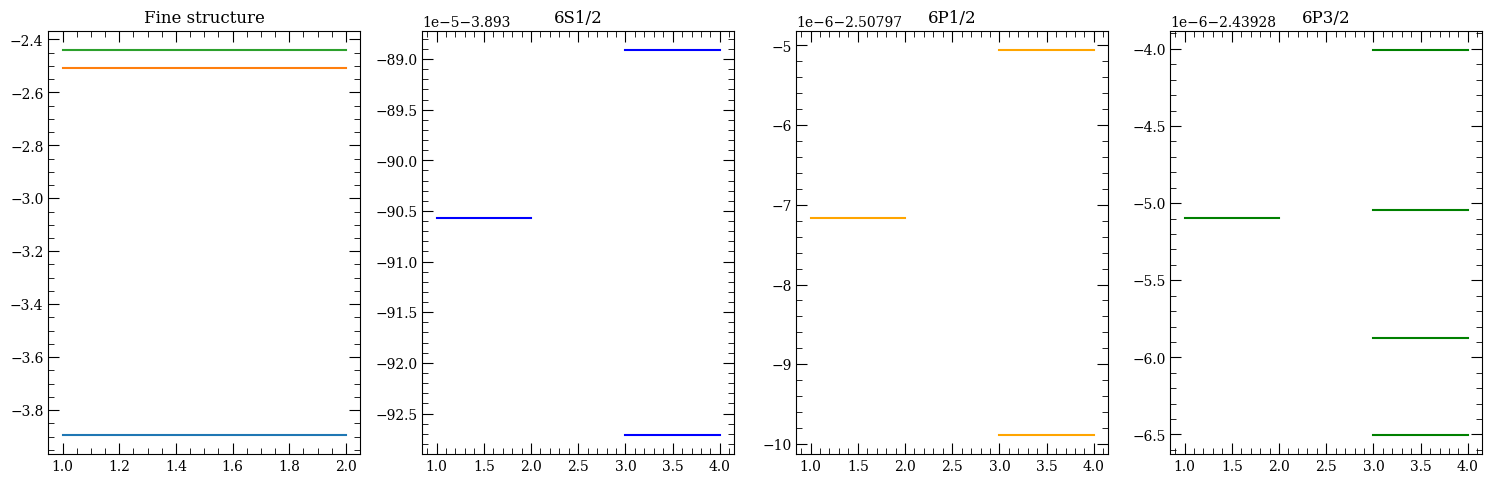

In [4]:
# return energy of hyperfine spin state of Cs in eV - atom.getEnergy(n,l,j,s)
# For n=6 , l=0 => (J=1/2, F = 3,4 )
# For n=6 , l=1 => (J=1/2, F = 3,4 ) and (J=3/2, F = 2,3,4,5)

print( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) )
print( eV_to_nm( atom.getEnergy(6,1,1.5) - atom.getEnergy(6,0,0.5) ))

# get the hyperfine structure coupling coefficient for each line
Coeff_ground    = atom.getHFSCoefficients(6,0,0.5)
Coeff_D1        = atom.getHFSCoefficients(6,1,0.5)
Coeff_D2        = atom.getHFSCoefficients(6,1,1.5)


# From the HPS coefficient, evaluation of the hypefine split for each line:
 # AlkaliAtom.getHFSEnergyShift( J , F , A , B , by default s=0.5 for alkalis)

E_hfs_ground       = np.empty(2, dtype=float) 
E_hfs_ground[0]    = atom.getHFSEnergyShift( 0.5, 3, Coeff_ground[0], Coeff_ground[1] )
E_hfs_ground[1]    = atom.getHFSEnergyShift( 0.5, 4, Coeff_ground[0], Coeff_ground[1] )

E_hfs_D1           = np.empty(2, dtype=float) 
E_hfs_D1[0]        = atom.getHFSEnergyShift( 0.5, 3, Coeff_D1[0], Coeff_D1[1] )
E_hfs_D1[1]        = atom.getHFSEnergyShift( 0.5, 4, Coeff_D1[0], Coeff_D1[1] )

E_hfs_D2           = np.empty(4, dtype=float) 
E_hfs_D2[0]        = atom.getHFSEnergyShift( 1.5, 2, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[1]        = atom.getHFSEnergyShift( 1.5, 3, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[2]        = atom.getHFSEnergyShift( 1.5, 4, Coeff_D2[0], Coeff_D2[1] )
E_hfs_D2[3]        = atom.getHFSEnergyShift( 1.5, 5, Coeff_D2[0], Coeff_D2[1] )


fig, axs = plt.subplots(1, 4)
fig.set_size_inches(18.5, 5.5)
# plot energy lines of fine structure
axs[0].plot([1,2], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)], label = "line 1")
axs[0].plot([1,2], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)], label = "line 2")
axs[0].plot([1,2], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)], label = "line 2")
axs[0].set_title('Fine structure')

# plot energy lines of hyperfine structure
axs[1].plot([1,2], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] , label = "line 1", color='blue')
axs[1].plot([3,4], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] + Hz_to_eV(E_hfs_ground[0]), label = "line 1", color='blue')
axs[1].plot([3,4], [atom.getEnergy(6,0,0.5),atom.getEnergy(6,0,0.5)] + Hz_to_eV(E_hfs_ground[1]), label = "line 1", color='blue')
axs[1].set_title('6S1/2')

# plot energy lines of hyperfine structure
axs[2].plot([1,2], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] , label = "line 1", color='orange')
axs[2].plot([3,4], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] + Hz_to_eV(E_hfs_D1[0]), label = "line 1", color='orange')
axs[2].plot([3,4], [atom.getEnergy(6,1,0.5),atom.getEnergy(6,1,0.5)] + Hz_to_eV(E_hfs_D1[1]), label = "line 1", color='orange')
axs[2].set_title('6P1/2')

# plot energy lines of hyperfine structure
axs[3].plot([1,2], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] , label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_eV(E_hfs_D2[0]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_eV(E_hfs_D2[1]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_eV(E_hfs_D2[2]), label = "line 1", color='green')
axs[3].plot([3,4], [atom.getEnergy(6,1,1.5),atom.getEnergy(6,1,1.5)] + Hz_to_eV(E_hfs_D2[3]), label = "line 1", color='green')
axs[3].set_title('6P3/2')

# Plot Energy Levels of Cesium
#levels = LevelPlot(atom)
#levels.makeLevels(nmin, nmax, lmin, lmax)
#levels.drawLevels()
h = constants.physical_constants['Planck constant in eV/Hz'][0]
kb = constants.physical_constants['Boltzmann constant in eV/K'][0]
DeltaE_ground = h*(E_hfs_ground[1]-E_hfs_ground[0])
print((E_hfs_ground[1]-E_hfs_ground[0])*1e-9)
print(np.exp(-DeltaE_ground/(kb*300)))




(10,)
(10,)
(10,)


Text(0.5, 0, 'Bfield(mT)')

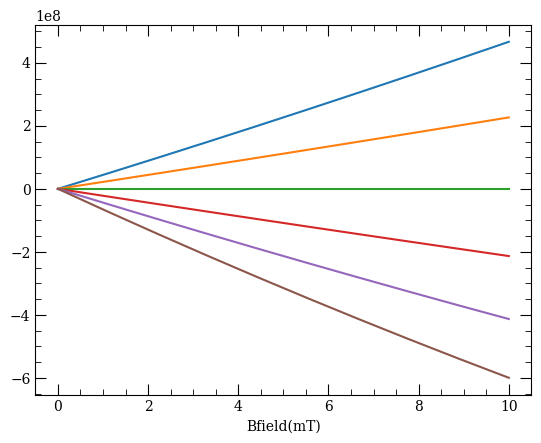

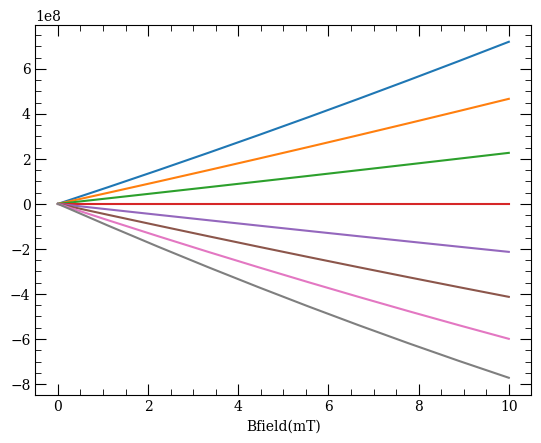

In [5]:
# get the Rabi frequency in presence of Magnetic field
B = np.linspace(0,1e-2,10) # magnetic field in T unit

print(B.shape)

# calculate larmor frequency using magnetic dipole
muB = 9.2740100783*1e-24 # Bohr magneton
hbar = 1.05457182*1e-34 # reduced planck constant
# get the hyperfine structure coupling coefficient for each line
Coeff_ground    = atom.getHFSCoefficients(6,0,0.5)
Coeff_D1        = atom.getHFSCoefficients(6,1,0.5)
Coeff_D2        = atom.getHFSCoefficients(6,1,1.5)
nu_hfs_ground = Coeff_ground[0]
nu_hfs_D1 = Coeff_D1[0]
nu_hfs_D2 = Coeff_D2[0]

# l=0, j=1/2, F=3 zeeman splitting
# we generate a matrix where the number of lines if the number of m , and the colons the size of B
F = 3
N = 2*F+1 # dimension of the Hilbert space
M = np.linspace(-F,F,N, dtype=int).reshape(-1,1)

g_F = atom.getLandegf(0,0.5,3)
omega_s = muB*g_F*(B.reshape(1,-1))/hbar
omega_hfs = (omega_s**2)/(np.pi*nu_hfs_ground)

OMEGAs = M*omega_s
OMEGAhfs = M**2*omega_hfs
print(OMEGAs[1,:].shape)

fig, ax = plt.subplots()
for i in range(1,len(OMEGAs)):
    ax.plot(1e3*B,OMEGAs[i,:]+OMEGAhfs[i,:]) 
ax.set_xlabel('Bfield(mT)') 
# l=0, j=1/2, F=3 zeeman splitting
# we generate a matrix where the number of lines if the number of m , and the colons the size of B
F = 4
N = 2*F+1 # dimension of the Hilbert space
M = np.linspace(-F,F,N, dtype=int).reshape(-1,1)

g_F = atom.getLandegf(0,0.5,3)
omega_s = muB*g_F*(B.reshape(1,-1))/hbar
omega_hfs = (omega_s**2)/(np.pi*nu_hfs_ground)

OMEGAs = M*omega_s
OMEGAhfs = M**2*omega_hfs
print(OMEGAs[1,:].shape)

fig, ax = plt.subplots()
for i in range(1,len(OMEGAs)):
    ax.plot(1e3*B,OMEGAs[i,:]+OMEGAhfs[i,:]) 
ax.set_xlabel('Bfield(mT)') 

In [6]:
from tabulate import tabulate

# dipole matrix element for hyperfine transition getDipoleMatrixElementHFStoFS(n1, l1, j1, f1, mf1, n2, l2, j2, mj2, q, s=0.5)
# principal quantum numbers n1 , n2. We will take = 6 in our case
#  orbital moment l1 , l2.  We will take = 0 or 1 in our case.
# q (int) – specifies transition that the driving field couples to, +1, 0 or -1 corresponding to polarization state sigma+ , pi or sigma-


# For n=6 , l=0 => (J=1/2, F = 3,4 )
# For n=6 , l=1 => (J=1/2, F = 3,4 ) and (J=3/2, F = 2,3,4,5)

table = [["","D2(ea0 unit)", "D1(ea0 unit)"],
["<J=1/2||er||J'=3/2>",4.4786,3.1669],
]

# (n1, l1, j1, f1, mf1) -> (mf1, n2, l2, j2, f2, mf2)
[L1,J1,F1,M1,L2,J2,F2,M2] = [ 0,0.5,4,-1, 1,1.5,3,0]
q = 1
#getDipoleMatrixElementHFS(n1, l1, j1, f1, mf1, n2, l2, j2, f2, mf2, q, s=0.5)
# 
print(tabulate(table))
print(atom.getReducedMatrixElementJ_asymmetric(6, L1, J1, 6, L2, J2))
print(atom.getReducedMatrixElementJ_asymmetric(6, L2, J2, 6, L1, J1))
print(F1)


b = atom.getReducedMatrixElementJ_asymmetric(6, L2, J2, 6, L1, J1)

c = (-1)**(2*F2-1+M1+J1+1+atom.I)
q1 = np.sqrt((2*F1 + 1) *(2.0 *F2 + 1) * (2 *J1 + 1))*Wigner6j(J2,J1,1,F1,F2,atom.I)


print(atom.getDipoleMatrixElementHFS(6,L1,J1,F1,M1,6,L2,J2,F2,M2,q))
print((4.478602220001236)*q1*c* Wigner3j(F1,1,F2,M1,q,-M2))
print((4.478602220001236)*np.sqrt(5/144)) # retreived from Steck


-------------------  ------------  ------------
                     D2(ea0 unit)  D1(ea0 unit)
<J=1/2||er||J'=3/2>  4.4786        3.1669
-------------------  ------------  ------------
4.478602220001236
4.478602220001236
4
0.8345382506753526
0.8345382506753525
0.8345382506753527
